In [1]:
from Prototype.crystals.crystal_structure import CrystalStructure
import matplotlib.pyplot as plt
import numpy as np
from Prototype.simulation.sequence_builder import SequenceBuilder
from Prototype.simulation.simulation_runner import SimulationRunner

In [2]:
crystal = CrystalStructure.from_file("../../native_crystal_database/edge.dat")
seq_builder = SequenceBuilder(crystal)
seq = seq_builder.create_sequence()

runner = SimulationRunner()

In [3]:
print(f"T should be >> {1 / seq_builder.omega_max * 1000}")

T should be >> 158.49505070203006


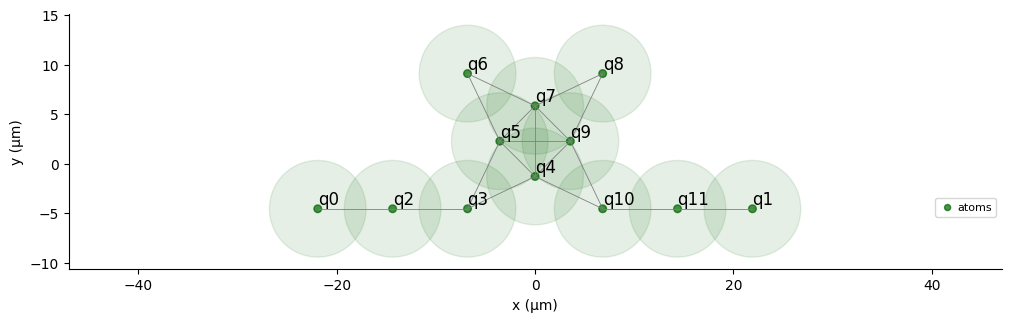

In [4]:
seq.register.draw(
    with_labels = True,
    blockade_radius = seq._device.rydberg_blockade_radius(seq_builder.omega_max),
    draw_half_radius = True
)

In [5]:
count_dict = runner.simulate_locally(seq, runs=100000)

10.0%. Run time:   4.25s. Est. time left: 00:00:00:38
20.0%. Run time:   7.17s. Est. time left: 00:00:00:28
30.0%. Run time:  10.47s. Est. time left: 00:00:00:24
40.0%. Run time:  14.11s. Est. time left: 00:00:00:21
50.0%. Run time:  17.69s. Est. time left: 00:00:00:17
60.0%. Run time:  21.73s. Est. time left: 00:00:00:14
70.0%. Run time:  26.59s. Est. time left: 00:00:00:11
80.0%. Run time:  31.40s. Est. time left: 00:00:00:07
90.0%. Run time:  36.29s. Est. time left: 00:00:00:04
Total run time:  41.45s


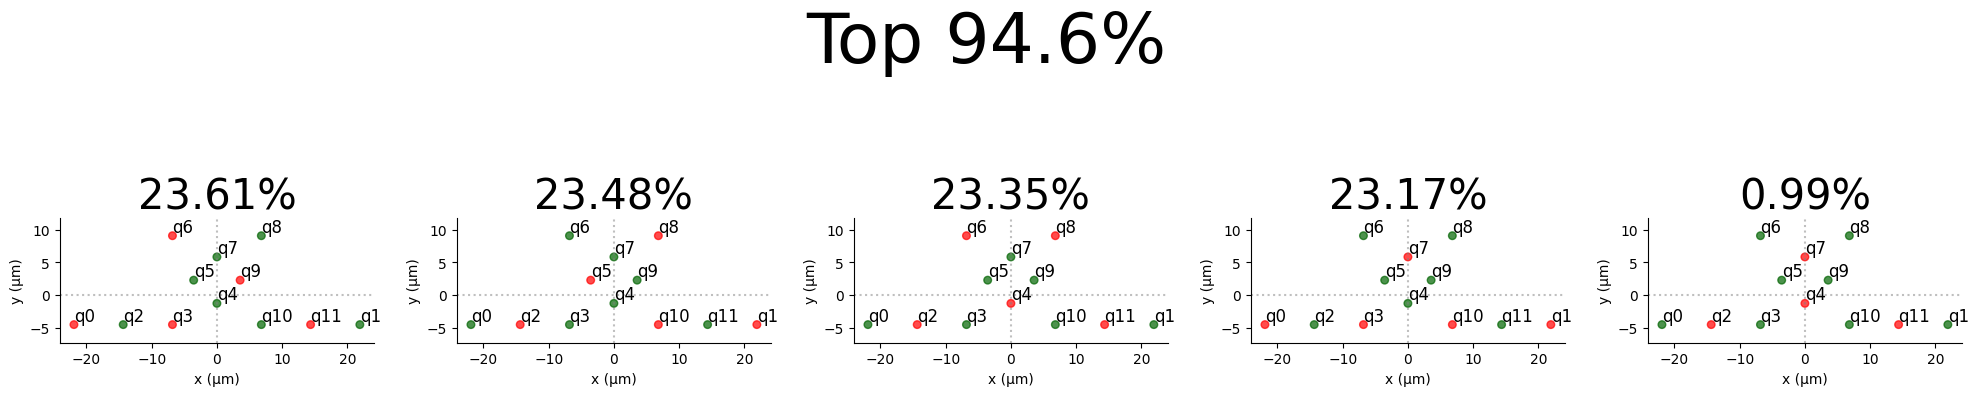

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(4*5, 4*1))
ax = ax.ravel()

total_count = sum(list(count_dict.values()))
count_covered = 0
for i in range(min(len(ax), len(count_dict))):
    m = list(count_dict.keys())[i]
    seq.register.draw(
        qubit_colors={f"q{k}": "red" for k in range(len(m)) if m[k] == '1'},
        show = False,
        custom_ax=ax[i]
    )
    percentage = count_dict[m]/total_count * 100
    count_covered += count_dict[m]
    ax[i].set_title(f"{str(round(percentage, 2))}%", fontsize=30)
    ax[i].get_legend().set_visible(False)
for i in range(len(count_dict), len(ax)):
    ax[i].set_visible(False)

plt.suptitle(f"Top {str(round(count_covered/total_count*100, 2))}%\n", fontsize=50)
plt.tight_layout()
plt.show()